In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("colorblind")
colorblind = sns.color_palette("colorblind")

# font_path = "/sailhome/akchak/.fonts/AvenirLTStd-Roman.otf"
# 
# prop = fm.FontProperties(fname=font_path)
# actual_name = prop.get_name()
# 
# plt.rcParams["font.family"] = actual_name     
plt.rcParams["font.size"] = 22             
plt.rcParams["figure.facecolor"] = "white" 
plt.rcParams["axes.facecolor"] = "white" 


In [3]:
%matplotlib inline

In [3]:
df_qwen = pd.read_csv('../results/qwen_results.csv')
df_llama = pd.read_csv('../results/llama_results.csv')

df_qwen = df_qwen.sort_values(by="step")
df_llama = df_llama.sort_values(by="step")


# Figure 1 and 2

In [50]:
df_qwen_base = df_qwen[df_qwen["condition"] == "base_ppo"].sort_values("step")
df_llama_base = df_llama[df_llama["condition"] == "base_ppo"].sort_values("step")

In [51]:
phenomena = ['avg_verifications', 'avg_backtracking', 'avg_subgoals', 'avg_backwards']
phenomena_to_label = {'avg_verifications': 'average verifications', 'avg_backtracking': 'average backtracking', 'avg_subgoals': 'average subgoals', 'avg_backwards': 'average backwards'}

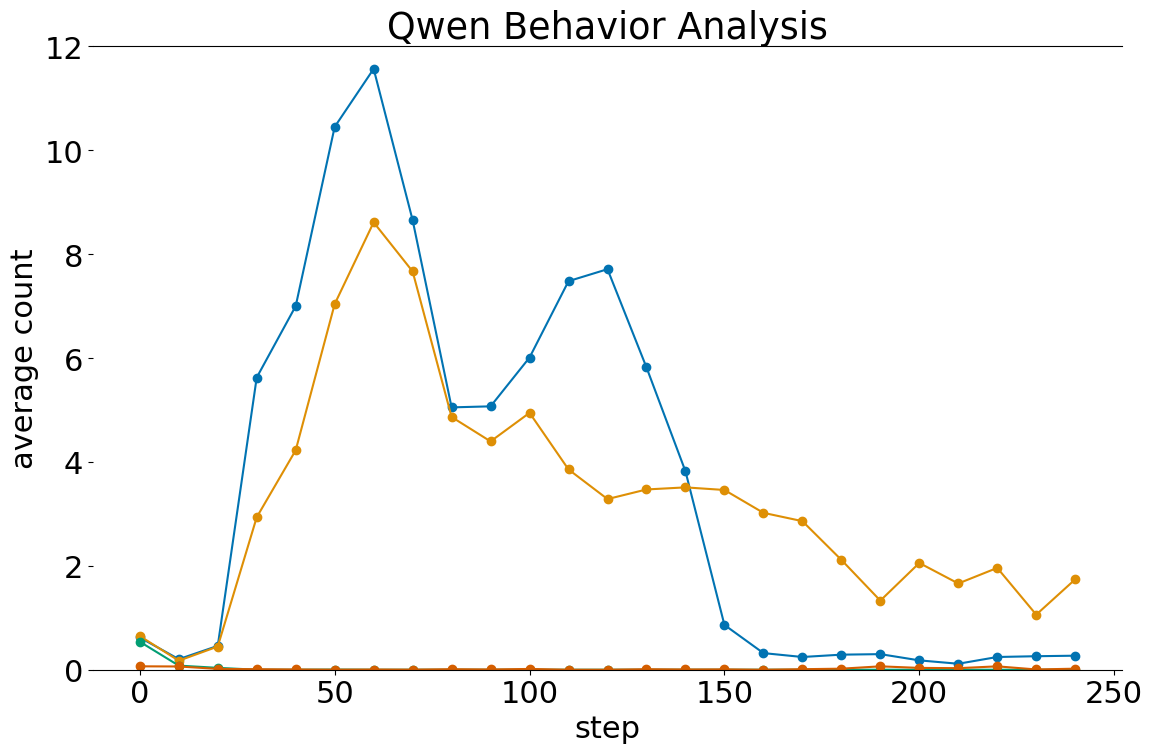

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(False) 
ax.set_ylim(0, 12)
# (If you still want x-axis gridlines, you can turn them on explicitly):
# ax.xaxis.grid(True, color="#dddddd")

for idx, phenomenon in enumerate(phenomena):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker="o",
            label=f"{phenomena_to_label[phenomenon]}",
            # color automatically comes from sns colorblind palette now
        )

ax.set_title("Qwen Behavior Analysis")
ax.set_xlabel("step")
ax.set_ylabel("average count")
# ax.legend()
plt.tight_layout()
plt.show()

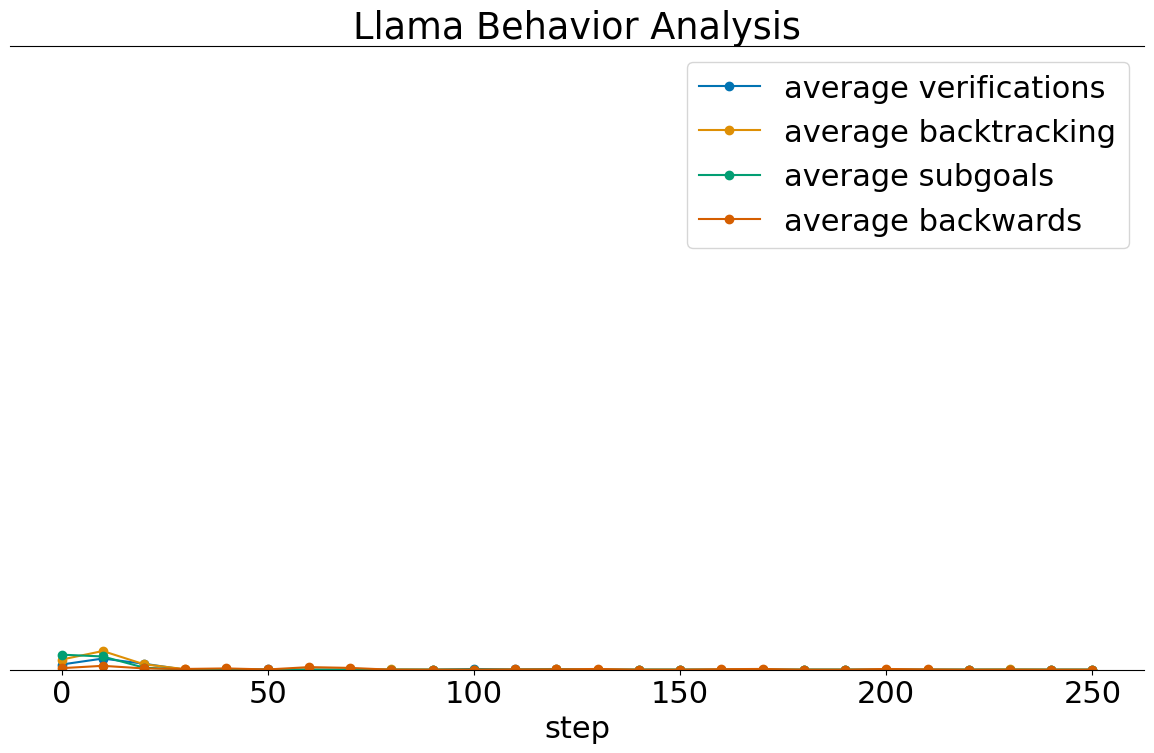

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(False) 
ax.set_ylim(0, 12)
ax.set_yticks([])
# (If you still want x-axis gridlines, you can turn them on explicitly):
# ax.xaxis.grid(True, color="#dddddd")

for idx, phenomenon in enumerate(phenomena):
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker="o",
            label=f"{phenomena_to_label[phenomenon]}",
            # color automatically comes from sns colorblind palette now
        )

ax.set_title("Llama Behavior Analysis")
ax.set_xlabel("step")
ax.legend()
plt.tight_layout()
plt.show()


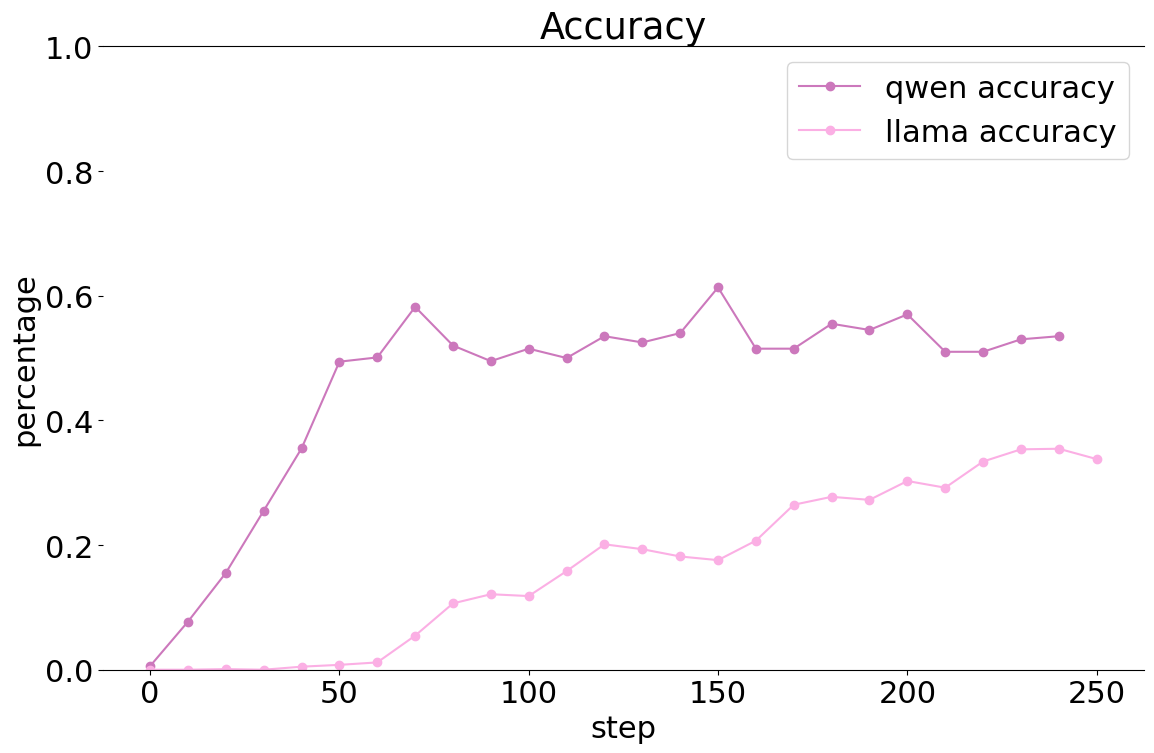

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(False) 
ax.set_ylim(0, 1.)

statistics = ["accuracy"]

for i, phenomenon in enumerate(statistics):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker="o",
            label=f"qwen {phenomenon}",
            color=colorblind[4],
        )
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker="o",
            label=f"llama {phenomenon}",
            color=colorblind[6],
        )
ax.set_title("Accuracy")
ax.set_xlabel("step")
ax.set_ylabel("percentage")
ax.legend()
plt.tight_layout()
plt.show()

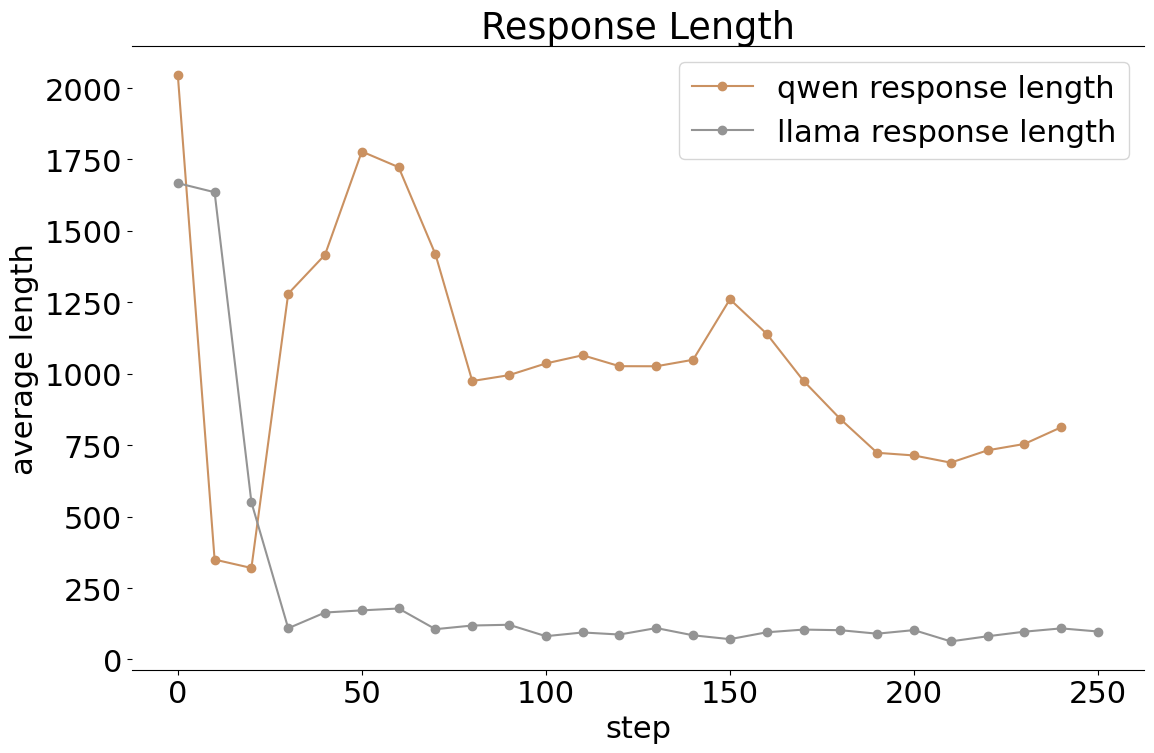

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(False) 

statistics = ["response_length"]
statistics_to_label = {"response_length": "response length"}

for i, phenomenon in enumerate(statistics):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker="o",
            label=f"qwen {statistics_to_label[phenomenon]}",
            color=colorblind[5],
        )
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker="o",
            label=f"llama {statistics_to_label[phenomenon]}",
            color=colorblind[7],
        )
ax.set_title("Response Length")
ax.set_xlabel("step")
ax.set_ylabel("average length")
ax.legend()
plt.tight_layout()
plt.show()

# Figures about cold-start data + RL

In [4]:
df_qwen = pd.read_csv('../results/qwen_results.csv')
df_llama = pd.read_csv('../results/llama_results.csv')


In [5]:
phenomena = ['avg_verifications', 'avg_backtracking', 'avg_subgoals', 'avg_backwards']
phenomena_to_label = {
    'avg_verifications': 'average verifications', 
    'avg_backtracking': 'average backtracking', 
    'avg_subgoals': 'average subgoals', 
    'avg_backwards': 'average backwards'
}
conditions = ['base_ppo', 'only_backtracking', 'backtracking_subgoal', 'backtracking_verification', 'backtracking_backward', 'all_strategies']


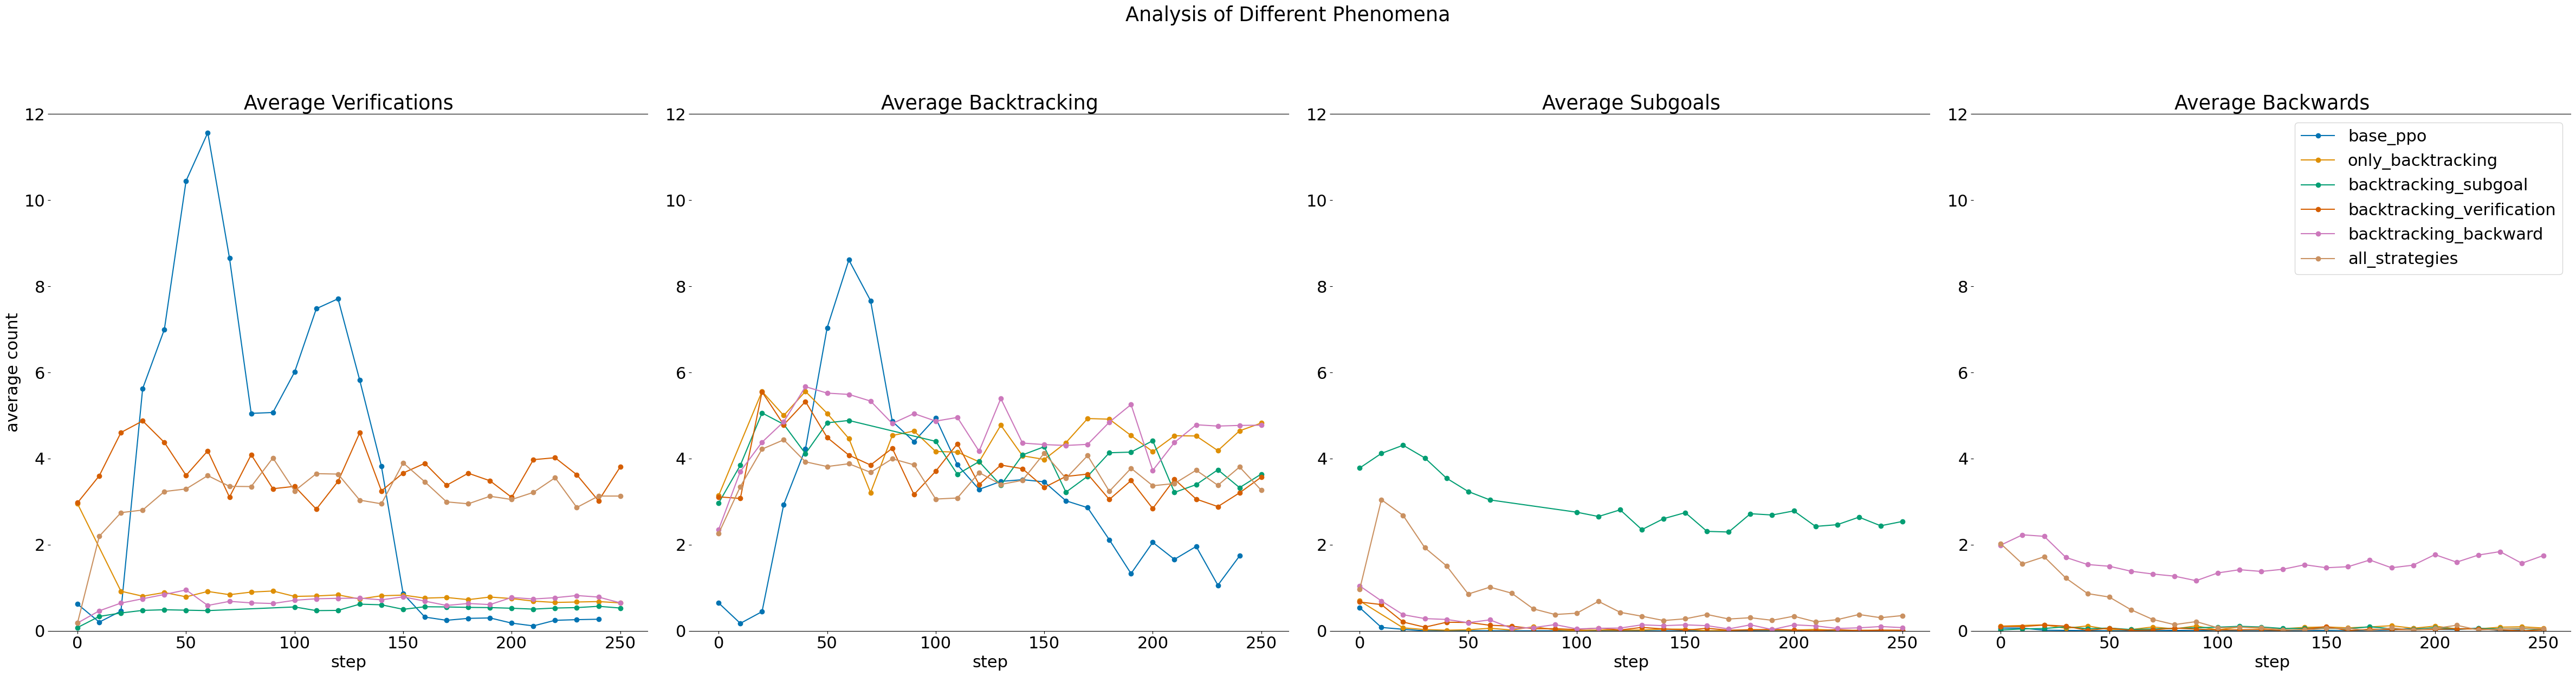

In [20]:
fig, axs = plt.subplots(1, 4, figsize=(48, 12))
fig.suptitle("Analysis of Different Phenomena", y=1.05)


for idx, phenomenon in enumerate(phenomena):
    ax = axs[idx]
    
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.yaxis.grid(False)
    ax.set_ylim(0, 12)
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_qwen[df_qwen["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker="o",
            label=f"{condition}",
        )
    
    ax.set_title(phenomena_to_label[phenomenon].title())
    ax.set_xlabel("step")
    if idx == 0:  # Only show y-label for the first subplot
        ax.set_ylabel("average count")
    
    if idx == len(phenomena) - 1:
        ax.legend()

plt.tight_layout()
plt.show()

## No positive all strategies vs all strategies

In [21]:
conditions = ["no_positive_all_strategies", "all_strategies"]

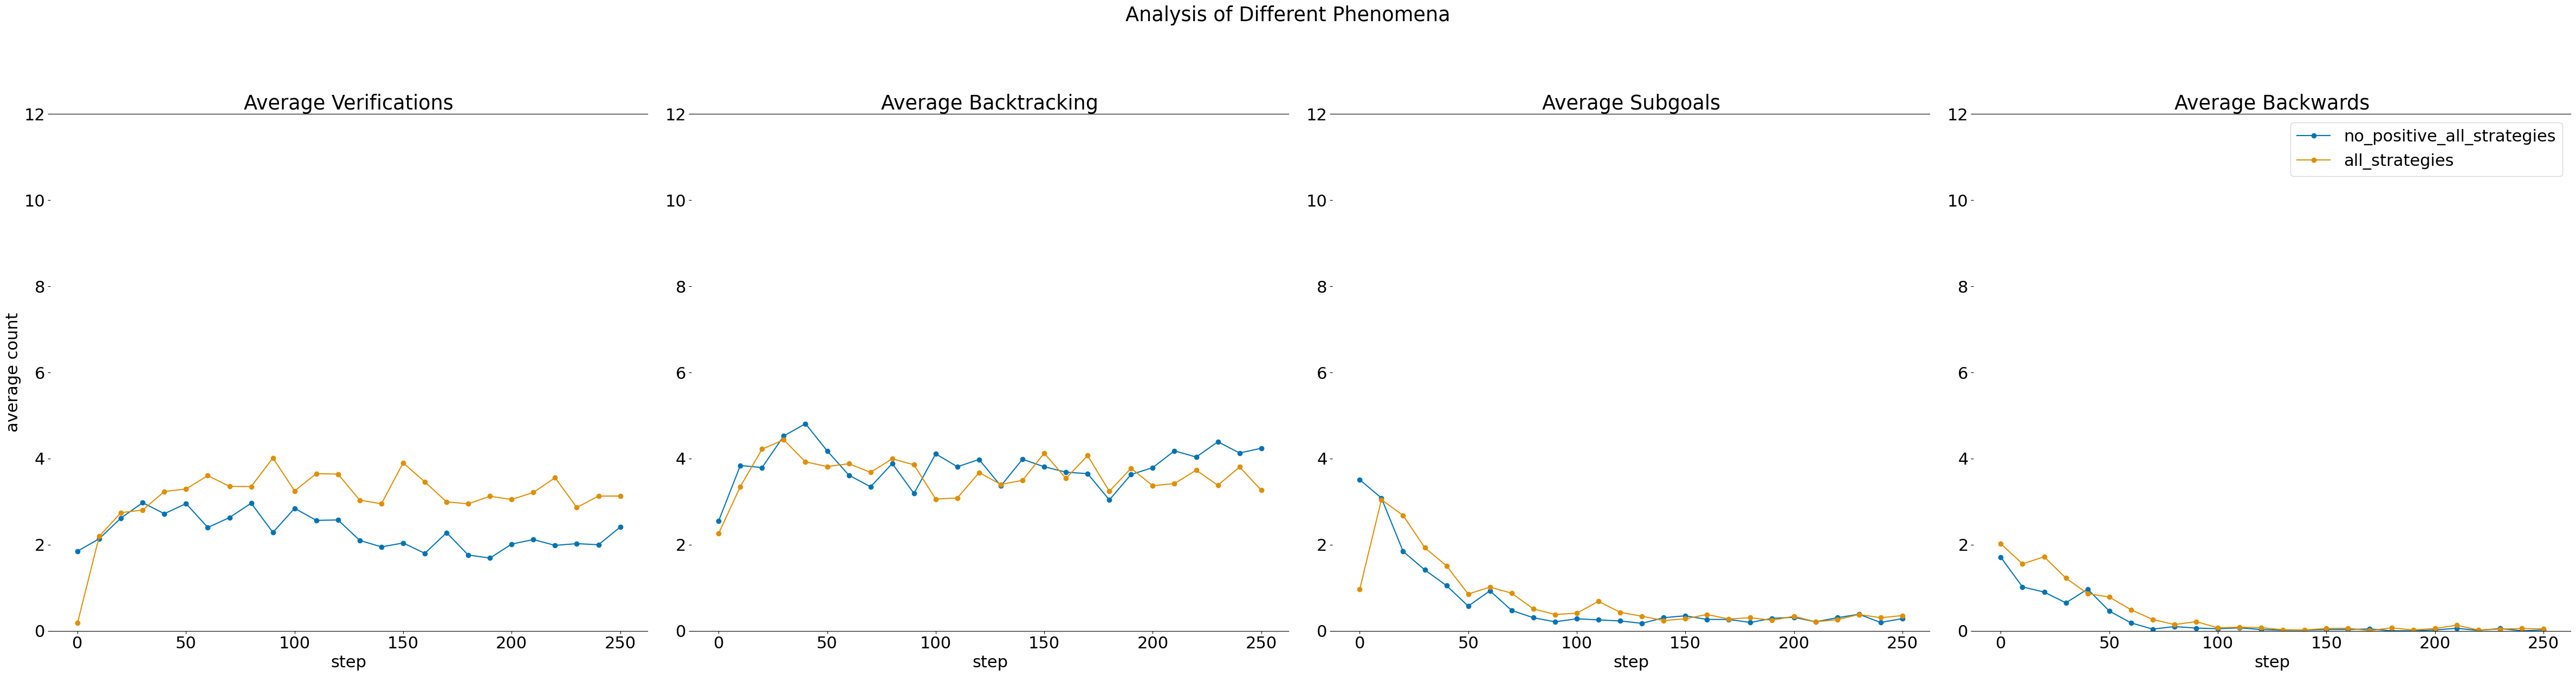

In [22]:
fig, axs = plt.subplots(1, 4, figsize=(48, 12))
fig.suptitle("Analysis of Different Phenomena", y=1.05)


for idx, phenomenon in enumerate(phenomena):
    ax = axs[idx]
    
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.yaxis.grid(False)
    ax.set_ylim(0, 12)
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_qwen[df_qwen["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker="o",
            label=f"{condition}",
        )
    
    ax.set_title(phenomena_to_label[phenomenon].title())
    ax.set_xlabel("step")
    if idx == 0:  # Only show y-label for the first subplot
        ax.set_ylabel("average count")
    
    if idx == len(phenomena) - 1:
        ax.legend()

plt.tight_layout()
plt.show()